***
# <font color=green size=10>PROYECTO FINAL: ESTADÍSTICAS DESCRIPTIVAS </font>
***

## Análisis Descriptivo de un Conjunto de Datos

Objetivo:  Realizar un análisis descriptivo del conjunto de datos central,  construir histogramas, calcular y evaluar medidas de tendencia central, medidas de localización y de dispersión de los datos.



# <font color=green>1.1 Dataset del proyecto</font>
***

### Muestra de domicilios Colombia - 2018

Las investigaciones por muestras de domicilios realizadas anualmente, busca encontrar características generales de la población, de educación, trabajo, rendimiento y otras, de acuerdo con las necesidades de información del país, tales como las características de migración, fertilidad, casamientos, salud, nutrición, entre otros temas. Estas muestras al pasar de los años consistuyen una herramienta importante para la formulación, validación y evaluación de políticas dirigidas al desarrollo socioeconómico y la mejora de las condiciones de vida en Colombia.

### Datos

Los datos fueron creados  de manera didáctica para este curso.

### Variables utilizadas

> ### Ingreso
> ***

Ingresos mensuales (en miles de pesos) del trabajo principal para personas de 10 años o más.

> ### Edad
> ***

Edad del entrevistado en la fecha de referencia en años.

> ### Altura
> ***

Altura del entrevistado en metros.

> ### Ciudad
> ***

Código de referência a 27 ciudades analizadas.


> ### Sexo
> ***

|Código|Descripción|
|---|---|
|0|Masculino|
|1|Femenino|

> ### Años de Estudio
> ***

|Código|Descripción|
|---|---|
|1|Sin estudios y menos de 1 año|
|2|1 año|
|3|2 años|
|4|3 años|
|5|4 años|
|6|5 años|
|7|6 años|
|8|7 años|
|9|8 años|
|10|9 años|
|11|10 años|
|12|11 años|
|13|12 años|
|14|13 años|
|15|14 años|
|16|15 años o más|
|17|No se sabe|
||No aplica|

> ### Color
> ***

|Código|Descripción|
|---|---|
|0|Indio|
|2|Blanco|
|4|Negro|
|6|Amarillo|
|8|Moreno|
|9|Sin declarar|

#### Tratamiento a los datos
***

> Algunos de los tratamientos de datos más frecuentes son:
> 1. Eliminar las observaciones (líneas) con entradas de datos inválidos;
> 2. Eliminar observaciones donde hay datos perdidos (missing data);
> 3. Filtros própios de la investigación, por ejemplo: considerar solo las encuestas realizadas a la cabeza de familia (responsable por el domicilio).

***
***

### Utilice la célula abajo para importar las bibliotecas que necesite para ejecutar las tareas
#### <font color='red'>Sugerencias: pandas, numpy, seaborn</font>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

### Importe el dataset y almacene el contenido en un DataFrame

In [5]:
datos = pd.read_csv('datos.csv')

### Visualice el contenido del DataFrame

In [4]:
datos.head()

,Ciudad,Sexo,Edad,Color,Años de Estudio,Ingreso,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631


### Para evaluar el comportamiento de la variable INGRESO vamos a construir una tabla de frecuencias considerando las siguintes clases según el salário mínimo (SM)
#### <font color='blue'>Descriva los puntos más relevantes que usted observe en la tabla y en el gráfico.</font>

Clases de ingreso:

<b>A</b> ► Más de 25 SM

<b>B</b> ► De 15 a 25 SM

<b>C</b> ► De 5 a 15 SM

<b>D</b> ► De 2 a 5 SM

<b>E</b> ► Hasta 2 SM

Para construir las clases de ingreso considere que el salário mínimo era de <b>$ 788,00</b> miles de pesos colombianos.

#### Siga los pasos abajo:

### 1º Definir los intevalos de las clases

In [6]:
clases = [
    datos.Ingreso.min(),
    2 * 788,
    5 * 788,
    15 * 788,
    25 * 788,
    datos.Ingreso.max()
]
clases

[0, 1576, 3940, 11820, 19700, 200000]

### 2º Definir los labels de las clases

In [7]:
labels = ['E', 'D', 'C', 'B', 'A']

### 3º Construir la columna de frecuencias

In [8]:
frecuencia = pd.value_counts(
  pd.cut(x = datos.Ingreso,
         bins = clases,
         labels = labels,
         include_lowest = True)
)
frecuencia

<ipython-input-8-244294a9027a>:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  frecuencia = pd.value_counts(


,count
Ingreso,
E,49755
D,18602
C,7241
B,822
A,420


### 4º Construir la columna de porcentajes

In [9]:
porcentaje = pd.value_counts(
  pd.cut(x = datos.Ingreso,
         bins = clases,
         labels = labels,
         include_lowest = True),
  normalize = True
) * 100
porcentaje

<ipython-input-9-0de79ec7d561>:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  porcentaje = pd.value_counts(


,proportion
Ingreso,
E,64.751432
D,24.208745
C,9.423477
B,1.069755
A,0.546590


### 5º Juntar las columnas de frecuencias y porcentajes y ordenar las líneas según los labels de las clases

In [10]:
dist_frec_ingreso = pd.DataFrame(
    {'Frecuencia': frecuencia, 'Porcentaje (%)': porcentaje}
)
dist_frec_ingreso.sort_index(ascending = False)

,Frecuencia,Porcentaje (%)
Ingreso,,
A,420,0.546590
B,822,1.069755
C,7241,9.423477
D,18602,24.208745
E,49755,64.751432


### Construya um gráfico de barras para visualizar las informaciones de la tabla de frecuencias de arriba

<Axes: xlabel='Ingreso'>

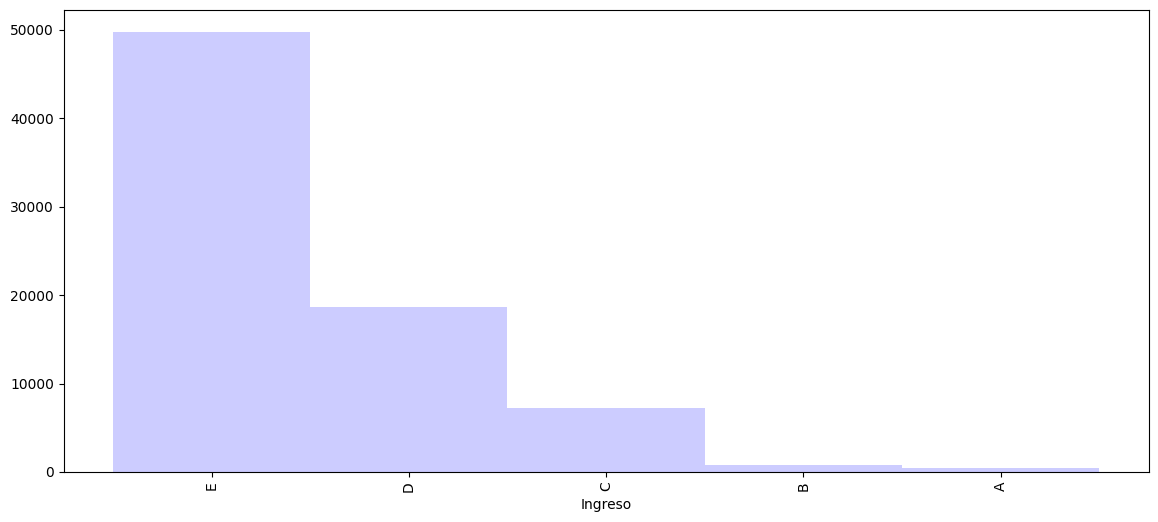

In [11]:
dist_frec_ingreso['Frecuencia'].plot.bar(width = 1, color = 'blue', alpha = 0.2, figsize=(14, 6))

> ### Conclusiones

Al observar el Histográma se puede inferir que la mayor concentración del Ingreso se encuentra en la categoria E la cual corresponde a personas que devengan hasta 2 Salarios Mínimos legales Mensuales Vigentes SMLMV

### Cree um histograma para las variables QUANTITATIVAS de nuestro dataset
#### <font color='blue'>Descriva los puntos más relevantes que usted observa en los gráficos (assimetrías y sus tipos, posibles causas para determinados comportamientos etc.)</font>

<ipython-input-12-85d802e9093e>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(datos['Edad'])


<Axes: title={'center': 'Distribución de Frecuencias - EDAD'}, xlabel='Años', ylabel='Density'>

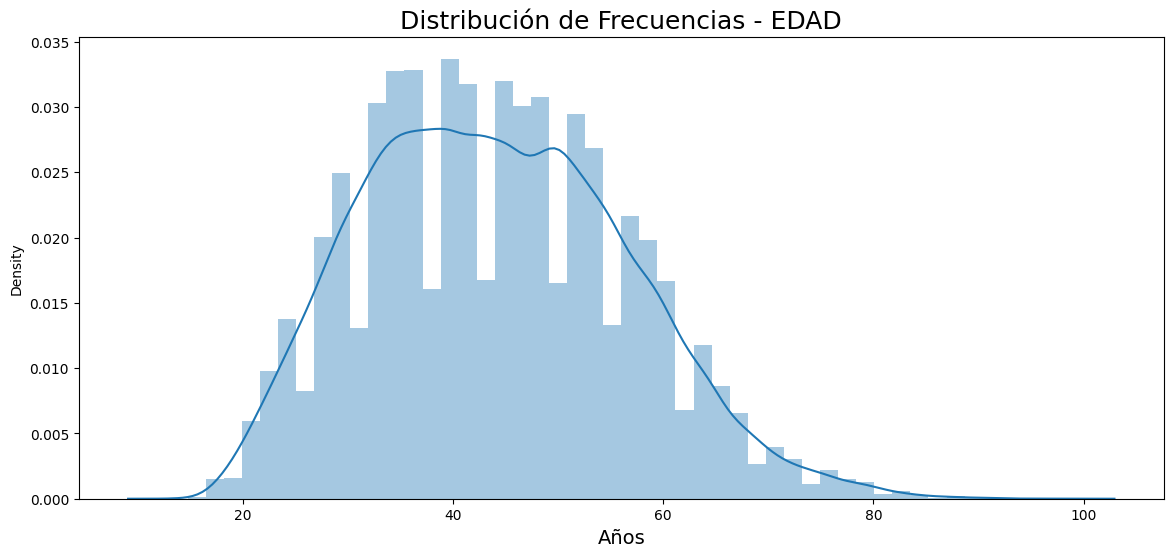

In [12]:
ax = sns.distplot(datos['Edad'])
ax.figure.set_size_inches(14, 6)
ax.set_title('Distribución de Frecuencias - EDAD', fontsize=18)
ax.set_xlabel('Años', fontsize=14)
ax

<ipython-input-13-f61b1386f811>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(datos['Altura'])


<Axes: title={'center': 'Distribución de Frecuencias - ALTURA'}, xlabel='Metros', ylabel='Density'>

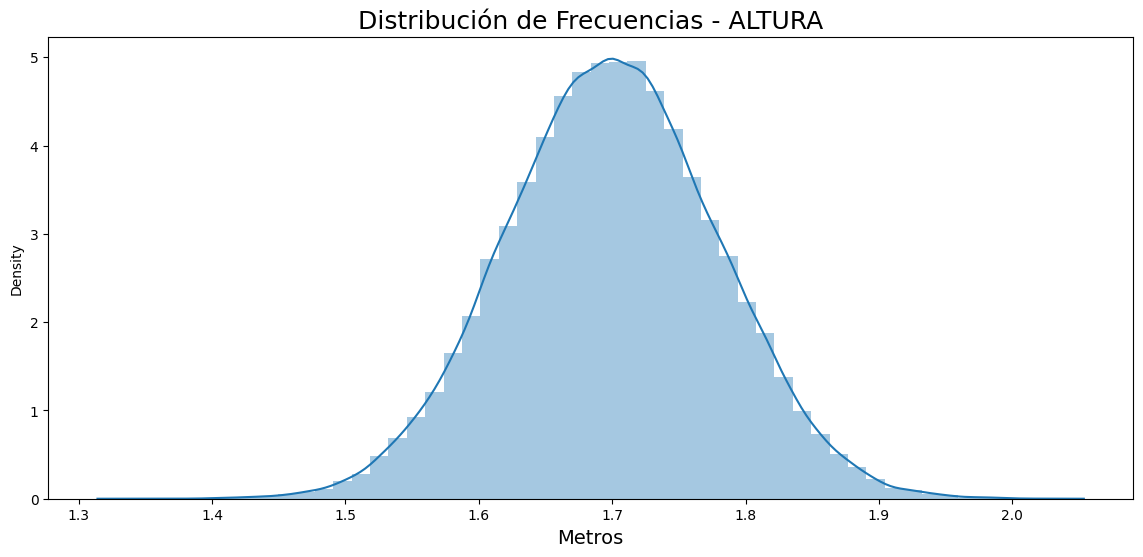

In [13]:
ax = sns.distplot(datos['Altura'])
ax.figure.set_size_inches(14, 6)
ax.set_title('Distribución de Frecuencias - ALTURA', fontsize=18)
ax.set_xlabel('Metros', fontsize=14)
ax

<ipython-input-14-4f06dec29c9c>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(datos['Ingreso'])


<Axes: title={'center': 'Distribución de Frecuencias - INGRESO'}, xlabel='Miles de pesos colombianos', ylabel='Density'>

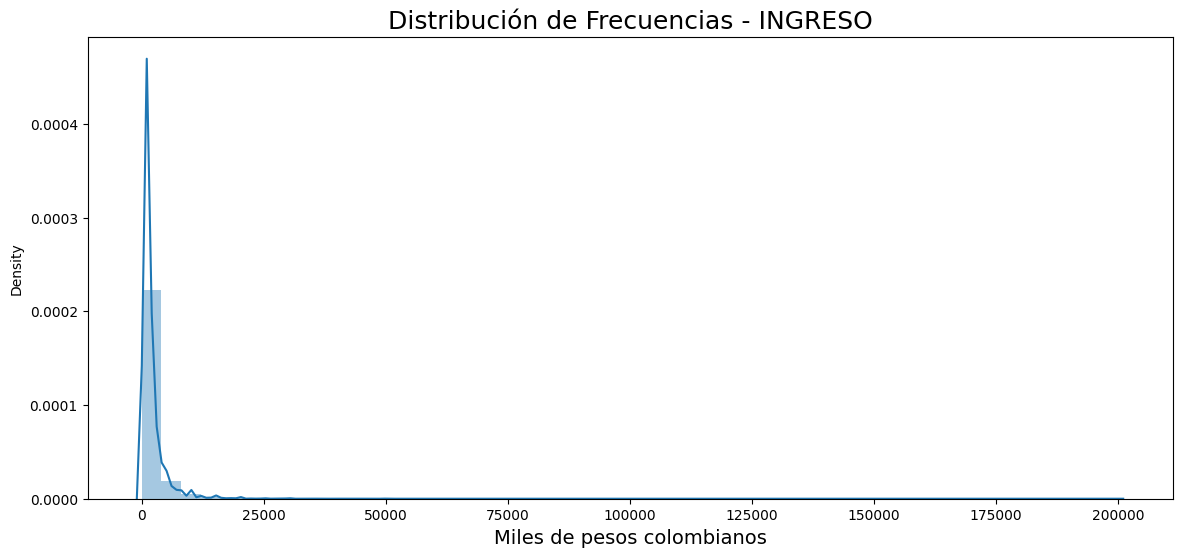

In [14]:
ax = sns.distplot(datos['Ingreso'])
ax.figure.set_size_inches(14, 6)
ax.set_title('Distribución de Frecuencias - INGRESO', fontsize=18)
ax.set_xlabel('Miles de pesos colombianos', fontsize=14)
ax



La distribución de los datos en el histograma de la variable ingresos presenta una asimetria a la derecha

### Para la variable INGRESO, construya un histograma solamente con las informaciones de las personas con rendimento hasta $ 20.000,00 (miles de pesos).

<ipython-input-15-93edb7b317a4>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(datos.query('Ingreso < 20000')['Ingreso'])


<Axes: title={'center': 'Distribución de Frecuencias - INGRESO - Personas con ingreso hasta $ 20.000,00'}, xlabel='Miles de pesos colombianos', ylabel='Density'>

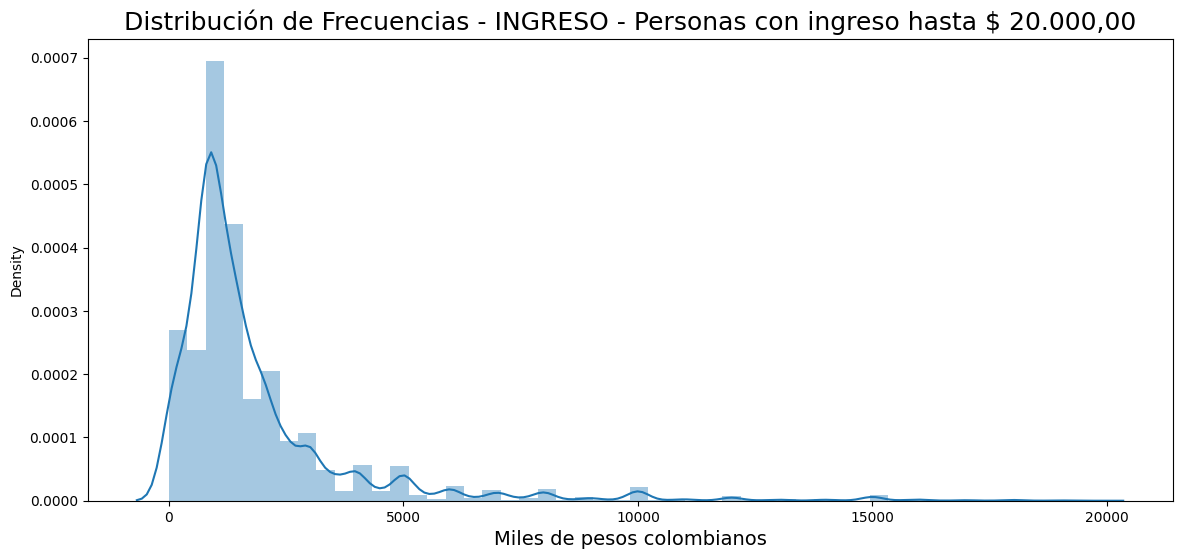

In [15]:
ax = sns.distplot(datos.query('Ingreso < 20000')['Ingreso'])
ax.figure.set_size_inches(14, 6)
ax.set_title('Distribución de Frecuencias - INGRESO - Personas con ingreso hasta $ 20.000,00', fontsize=18)
ax.set_xlabel('Miles de pesos colombianos', fontsize=14)
ax

### Construya una tabla de frecuencias y una con los porcentajes cruzando las variables SEXO y COLOR
#### <font color='blue'>Evalue el resultado de la tabla y escriva sus conclusiones principales</font>
#### <font color='red'>Utilize los diccionarios abajo para renombrar las líneas y columnas de las tablas de frecuencias y de los gráficos en nuestro proyecto</font>

In [16]:
sexo = {
    0: 'Masculino',
    1: 'Femenino'
}
color = {0: 'Indio',
         2: 'Blanco',
         4: 'Negro',
         6: 'Amarillo',
         8: 'Pardo',
         9: 'Sin declarar'}
anos_de_estudio = {
    1: 'Sin estudios y menos de 1 año',
    2: '1 año',
    3: '2 años',
    4: '3 años',
    5: '4 años',
    6: '5 años',
    7: '6 años',
    8: '7 años',
    9: '8 años',
    10: '9 años',
    11: '10 años',
    12: '11 años',
    13: '12 años',
    14: '13 años',
    15: '14 años',
    16: '15 años ou más',
    17: 'No se sabe'
}

In [17]:
frecuencia = pd.crosstab(datos.Sexo,
                         datos.Color
                        )
frecuencia.rename(index = sexo, inplace = True)
frecuencia.rename(columns = color, inplace = True)
frecuencia

Color,Indio,Blanco,Negro,Amarillo,Pardo
Sexo,,,,,
Masculino,256,22194,5502,235,25063
Femenino,101,9621,2889,117,10862


In [18]:
porcentaje = pd.crosstab(datos.Sexo,
                         datos.Color,
                         normalize = True
                        ) * 100
porcentaje.rename(index = sexo, inplace = True)
porcentaje.rename(columns = color, inplace = True)
porcentaje

Color,Indio,Blanco,Negro,Amarillo,Pardo
Sexo,,,,,
Masculino,0.333160,28.883394,7.160333,0.305830,32.617126
Femenino,0.131442,12.520822,3.759761,0.152264,14.135867


> ### Conclusiones

La tabla de frecuencias muestra que, en general, los hombres presentan mayores frecuencias en todas las categorías de color de piel en comparación con las mujeres. El color Pardo es el más común en ambos sexos, seguido del color Blanco, lo cual sugiere una distribución predominante de estos colores en la población estudiada. Por otro lado, los colores Indio y Amarillo tienen las frecuencias más bajas tanto en hombres como en mujeres, lo que indica una menor representación de estos tonos en la muestra. Este patrón de frecuencias sugiere que, aunque existen variaciones en la distribución de color de piel entre sexos, los colores Pardo y Blanco son dominantes en ambos, mientras que Indio y Amarillo son relativamente menos comunes.

## Realize, para la variable INGRESO, un análisis descriptivo con las herramientas que aprendimos en nuestro entrenamiento.

### Obtenga la media aritmética

In [19]:
datos.Ingreso.mean()

2000.3831988547631

### Obtenga la mediana

In [20]:
datos.Ingreso.median()

1200.0

### Obtenga la moda

In [21]:
datos.Ingreso.mode()

,Ingreso
0,788


### Obtenga la desviación media absoluta

In [31]:
datos

,Ciudad,Sexo,Edad,Color,Años de Estudio,Ingreso,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631
...,...,...,...,...,...,...,...
76835,53,1,46,2,11,812,1.687030
76836,53,0,30,4,7,1500,1.792934
76837,53,0,32,8,12,1300,1.830587
76838,53,0,57,8,4,1500,1.726344


In [38]:
Ingresos = datos[['Ingreso']]
Ingresos

,Ingreso
0,800
1,1150
2,880
3,3500
4,150
...,...
76835,812
76836,1500
76837,1300
76838,1500


In [40]:
Ingresos_media = Ingresos.mean()[0]
Ingresos_media

<ipython-input-40-47604daf54dd>:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Ingresos_media = Ingresos.mean()[0]


2000.3831988547631

In [41]:
Ingresos['Desviación']= Ingresos['Ingreso'] - Ingresos_media
Ingresos

<ipython-input-41-d4a28bbbf994>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Ingresos['Desviación']= Ingresos['Ingreso'] - Ingresos_media


,Ingreso,Desviación
0,800,-1200.383199
1,1150,-850.383199
2,880,-1120.383199
3,3500,1499.616801
4,150,-1850.383199
...,...,...
76835,812,-1188.383199
76836,1500,-500.383199
76837,1300,-700.383199
76838,1500,-500.383199


In [42]:
Ingresos['DM'] = abs(Ingresos['Desviación'])
Ingresos

<ipython-input-42-ca9a6c8a9c79>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Ingresos['DM'] = abs(Ingresos['Desviación'])


,Ingreso,Desviación,DM
0,800,-1200.383199,1200.383199
1,1150,-850.383199,850.383199
2,880,-1120.383199,1120.383199
3,3500,1499.616801,1499.616801
4,150,-1850.383199,1850.383199
...,...,...,...
76835,812,-1188.383199,1188.383199
76836,1500,-500.383199,500.383199
76837,1300,-700.383199,700.383199
76838,1500,-500.383199,500.383199


In [43]:
# El Desvio Medio Absoluto de la variable Ingresos es:
Ingresos['DM'].mean()

1526.4951371638058

### Obtenga la varianza

In [44]:
datos.Ingreso.var()

11044906.00622118

### Obtenga la desviación estandar

In [45]:
datos.Ingreso.std()

3323.3877303470294

### Obtenga la media, mediana y valor máximo de la variable INGRESO según el SEXO y el COLOR
#### <font color='blue'>Destaque los puntos más importantes que usted observa en las tabulaciones</font>
#### <font color='red'>El parámetro <i>aggfunc</i> de la función <i>crosstab()</i> puede recibir una lista de funciones. Ejemplo: <i>aggfunc = {'mean', 'median', 'max'}</i></font>

In [46]:
ingreso_estadisticas_por_sexo_y_color = pd.crosstab(datos.Color,
                                                datos.Sexo,
                                                values = datos.Ingreso,
                                                aggfunc = {'mean', 'median', 'max'})
ingreso_estadisticas_por_sexo_y_color.rename(index = color, inplace = True)
ingreso_estadisticas_por_sexo_y_color.rename(columns = sexo, inplace = True)
ingreso_estadisticas_por_sexo_y_color

max                  mean                 median         
Sexo     Masculino Femenino    Masculino     Femenino Masculino Femenino
Color                                                                   
Indio        10000   120000  1081.710938  2464.386139     797.5    788.0
Blanco      200000   100000  2925.744435  2109.866750    1700.0   1200.0
Negro        50000    23000  1603.861687  1134.596400    1200.0    800.0
Amarillo     50000    20000  4758.251064  3027.341880    2800.0   1500.0
Pardo       100000    30000  1659.577425  1176.758516    1200.0    800.0

> ### Conclusiones

La tabla muestra que los valores máximos, medias y medianas difieren notablemente entre sexos y colores de piel, indicando variabilidad y posible asimetría en las distribuciones. Los hombres tienden a tener valores máximos y promedios más altos en la mayoría de los colores, excepto en el color Indio, donde las mujeres superan a los hombres en la media. Los colores Blanco y Amarillo destacan con las medias y máximos más altos en ambos sexos, sugiriendo una mayor dispersión o presencia de valores extremos, especialmente en hombres, donde la diferencia entre media y mediana es más pronunciada. Este patrón sugiere una mayor dispersión de los datos para ciertos colores en cada sexo, y refleja diferencias significativas en la distribución de estos valores en función del sexo y color de piel.

### Obtenga las medidas de dispersión de la variable INGRESO según el SEXO y el COLOR
#### <font color='blue'>Destaque los puntos más importantes que usted observa en las tabulaciones</font>
#### <font color='red'>O parámetro <i>aggfunc</i> de la función <i>crosstab()</i> puede reciber una lista de funciones. Ejemplo: <i>aggfunc = {'mad', 'var', 'std'}</i></font>

In [54]:
DM = Ingresos['DM'].mean()
var = datos.Ingreso.var()
std = datos.Ingreso.std()

print('Desviación Media Absoluta:', DM)
print('Varianza:', var)
print('Desviación Estandar:', std)


Desviación Media Absoluta: 1526.4951371638058
Varianza: 11044906.00622118
Desviación Estandar: 3323.3877303470294


In [56]:
import pandas as pd

# Suponiendo que 'datos' es el DataFrame y 'Ingreso' la columna de interés

# Agrupar por 'Color' y 'Sexo', y calcular el máximo, media y mediana de 'Ingreso'
ingreso_dispersion_por_sexo_y_color = datos.groupby(['Color', 'Sexo'])['Ingreso'].agg(
    max='max',
    mean='mean',
    median='median'
).round(2).unstack(level='Sexo')  # Usar unstack para organizar por Sexo en columnas

# Renombrar los índices y columnas de 'Color' y 'Sexo' para el formato de salida deseado
color = {0: 'Indio', 1: 'Blanco', 2: 'Negro', 3: 'Amarillo', 4: 'Pardo'}
ingreso_dispersion_por_sexo_y_color.rename(index=color, inplace=True)

# Mostrar el resultado
print(ingreso_dispersion_por_sexo_y_color)



          max             mean           median        
Sexo        0       1        0        1       0       1
Color                                                  
Indio   10000  120000  1081.71  2464.39   797.5   788.0
Negro  200000  100000  2925.74  2109.87  1700.0  1200.0
Pardo   50000   23000  1603.86  1134.60  1200.0   800.0
6       50000   20000  4758.25  3027.34  2800.0  1500.0
8      100000   30000  1659.58  1176.76  1200.0   800.0


> ### Conclusiones

El análisis de los resultados presenta una comparación de las estadísticas de dispersión (máximo, media y mediana) para la variable "Ingreso" desglosada por sexo y color. En términos generales, se observa que los valores máximos de los ingresos varían significativamente entre los diferentes colores, con el color **Indio** para los hombres mostrando un máximo de 10,000, mientras que para las mujeres, el valor máximo es mucho más alto (120,000). En cuanto a la **media**, los hombres tienen ingresos más bajos en la mayoría de los colores, con el valor más alto en **Blanco** para ambos géneros, pero notablemente más alto en los hombres. En cuanto a la **mediana**, los valores son relativamente cercanos a la media en casi todos los casos, aunque los hombres tienden a tener una mediana mayor en los colores como **Blanco**, **Negro** y **Pardo**, mientras que en otros colores como **Indio** y **Amarillo**, las diferencias entre mediana y media son más pronunciadas. En resumen, las diferencias observadas entre los géneros reflejan la disparidad de ingresos entre hombres y mujeres según el color, con una tendencia a que los hombres tengan ingresos más altos en la mayoría de los colores, aunque la brecha varía entre las diferentes categorías.

### Construya um box plot de la variable INGRESO según SEXO y COLOR
#### <font color='blue'>¿Es posible verificar algún comportamiento diferenciado en el rendimiento entre los grupos de personas analizados? Evalue el gráfico y destaque los puntos más importantes.</font>
#### <font color='red'>1º - Utilice solamente las informaciones de personas con ingreso abajo de $ 10.000</font>
#### <font color='red'>2º - Para incluir una tercera variable en la construcción de un boxplot utilice el parámetro <i>hue</i> e indique la variable que quiere incluir en la subdivisión.</font>
#### Más informaciones: https://seaborn.pydata.org/generated/seaborn.boxplot.html

<ipython-input-58-e3c6f0102358>:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(['Indio', 'Blanco', 'Negro', 'Amarillo', 'Pardo', 'Sin declarar'], fontsize=12)    # Configurando el label de cada categoría del eje Y


<Axes: title={'center': 'Box-plot del INGRESO por SEXO y COLOR'}, xlabel='Miles de pesos colombianos', ylabel='Color'>

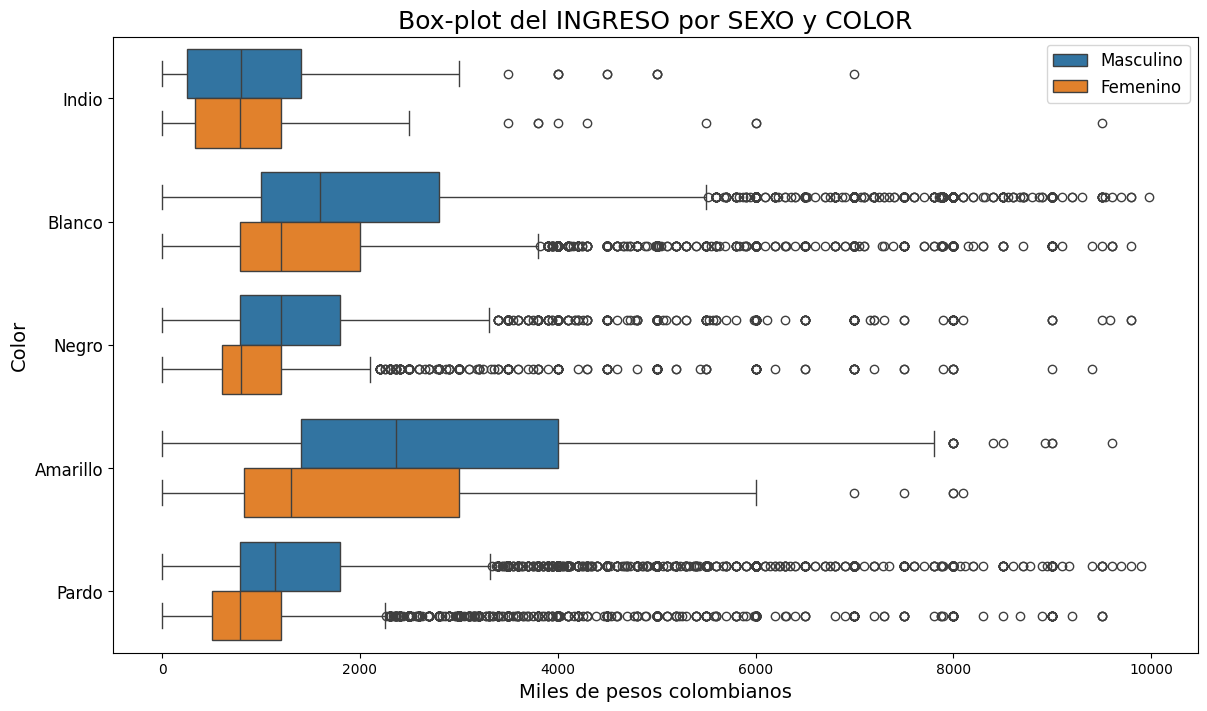

In [58]:
ax = sns.boxplot(x = 'Ingreso', y = 'Color', hue = 'Sexo', data=datos.query('Ingreso < 10000'), orient='h')

ax.figure.set_size_inches(14, 8)    # Personalizando el tamaño de la figura

ax.set_title('Box-plot del INGRESO por SEXO y COLOR', fontsize=18)    # Configurando el título del gráfico

ax.set_xlabel('Miles de pesos colombianos', fontsize=14)    # Configurando el label del eje X

ax.set_ylabel('Color', fontsize=14)    # Configurando el label del eje Y
ax.set_yticklabels(['Indio', 'Blanco', 'Negro', 'Amarillo', 'Pardo', 'Sin declarar'], fontsize=12)    # Configurando el label de cada categoría del eje Y

# Configuraciones de la leyenda del gráfico (Sexo)
handles, _ = ax.get_legend_handles_labels()
ax.legend(handles, ['Masculino', 'Femenino'], fontsize=12)

ax

### <font color='red' size = 10> DESAFÍO

### ¿Cuál es el porcentaje de personas de nuestro <i>dataset</i> que ganan un salário mínimo ($ 788,00) o menos?
#### <font color='red'>Utilize la función <i>percentileofscore()</i> do <i>scipy</i> para realizar estos análisis.</font>
#### Más informaciones: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.percentileofscore.html


In [61]:
from scipy import stats

porcentaje = stats.percentileofscore(datos.Ingreso, 788, kind = 'weak')
print("{0:.2f}%".format(porcentaje))

28.87%


### ¿Cuál es el valor máximo ganado por 99% de las personas de nuestro <i>dataset</i>?
#### <font color='red'>Utilice el método <i>quantile()</i> de <i>pandas</i> para realizar estos análisis.</font>

In [62]:
valor = datos.Ingreso.quantile(.99)
print("$ {0:.2f}".format(valor))

$ 15000.00


### Obtenga la media, mediana, valor máximo y desviación estandar de la variable INGRESO según AÑOS DE ESTUDIO y SEXO
#### <font color='blue'>Destaque los puntos más importantes que usted observa en las Tabulaciones</font>
#### <font color='red'>O parámetro <i>aggfunc</i> de la función <i>crosstab()</i> puede recibir una lista de funciones. Ejemplo: <i>aggfunc = ['mean', 'median', 'max', 'std']</i></font>

In [63]:
ingreso_estadisticas_por_sexo_y_estudo = pd.crosstab(datos['Años de Estudio'],
                                         datos.Sexo,
                                         aggfunc = {'mean', 'median', 'max', 'std'},
                                         values = datos.Ingreso).round(2)
ingreso_estadisticas_por_sexo_y_estudo.rename(index = anos_de_estudio, inplace = True)
ingreso_estadisticas_por_sexo_y_estudo.rename(columns = sexo, inplace = True)
ingreso_estadisticas_por_sexo_y_estudo

max               mean             median  \
Sexo                          Masculino Femenino Masculino Femenino Masculino   
Años de Estudio                                                                 
Sin estudios y menos de 1 año     30000    10000    799.49   516.20     700.0   
1 año                             30000     2000    895.63   492.77     788.0   
2 años                            40000     4000    931.18   529.91     788.0   
3 años                            80000     3500   1109.20   546.85     800.0   
4 años                            50000    10000   1302.33   704.28    1000.0   
5 años                            35000     8000   1338.65   781.39    1045.0   
6 años                            25000     6000   1448.88   833.73    1200.0   
7 años                            40000     9000   1465.50   830.75    1200.0   
8 años                            30000    18000   1639.40   933.62    1300.0   
9 años                            60000    20000   1508.04   868.02    1200.0   
10 años                           45000     6000   1731.27   925.92    1218.0   
11 años                          200000   100000   2117.06  1286.79    1500.0   
12 años                           30000   120000   2470.33  1682.31    1800.0   
13 años                           25000    20000   3195.10  1911.73    2400.0   
14 años                           50000    20000   3706.62  2226.46    2500.0   
15 años ou más                   200000   100000   6134.28  3899.51    4000.0   
No se sabe                         7000     3000   1295.76   798.17    1200.0   

                                             std           
Sexo                          Femenino Masculino Femenino  
Años de Estudio                                            
Sin estudios y menos de 1 año    390.0   1023.90   639.31  
1 año                            400.0   1331.95   425.29  
2 años                           450.0   1435.17   498.23  
3 años                           500.0   2143.80   424.12  
4 años                           788.0   1419.82   629.55  
5 años                           788.0   1484.65   635.78  
6 años                           788.0   1476.63   574.55  
7 años                           788.0   1419.71   602.04  
8 años                           800.0   1515.58   896.78  
9 años                           788.0   2137.66   973.22  
10 años                          800.0   2078.61   620.61  
11 años                         1000.0   2676.54  1819.04  
12 años                         1200.0   2268.08  4851.83  
13 años                         1300.0   2797.12  2053.79  
14 años                         1600.0   3987.21  2064.08  
15 años ou más                  2800.0   7447.61  4212.77  
No se sabe                       788.0    979.65   459.99

### Construya un box plot de la variable INGRESO según AÑOS DE ESTUDIO y SEXO
#### <font color='blue'>¿Es posible verificar algun comportamiento diferenciado en el rendimiento entre los grupos de personas analizadas? Evalue el gráfico y destaque los puntos más importantes.</font>
#### <font color='red'>1º - Utilice solamente las informaciones de personas com ingreso abajo de $ 10.000</font>
#### <font color='red'>2º - Utilice la variable EDAD para identificar si la desigualdad se verifica para personas de la mesma edad. Ejemplo: <i>data=datos.query('Ingreso < 10000 and Edad == 40')</i> ou <i>data=datos.query('Ingreso < 10000 and Edad == 50')</i></font>
#### <font color='red'>3º - Para incluir una tercera variable en la construcción de un boxplot utilice el parámetro <i>hue</i> e indique la variable que quiere incluir en la subdivisión.</font>
#### Más informaciones: https://seaborn.pydata.org/generated/seaborn.boxplot.html

<ipython-input-64-dedfc8261744>:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([key for key in anos_de_estudio.values()], fontsize=12)    # Configurando el label de cada categoría del eje Y


<Axes: title={'center': 'Box-plot del INGRESO por SEXO y AÑOS DE ESTUDIO'}, xlabel='Miles de pesos colombianos', ylabel='Años de Estudio'>

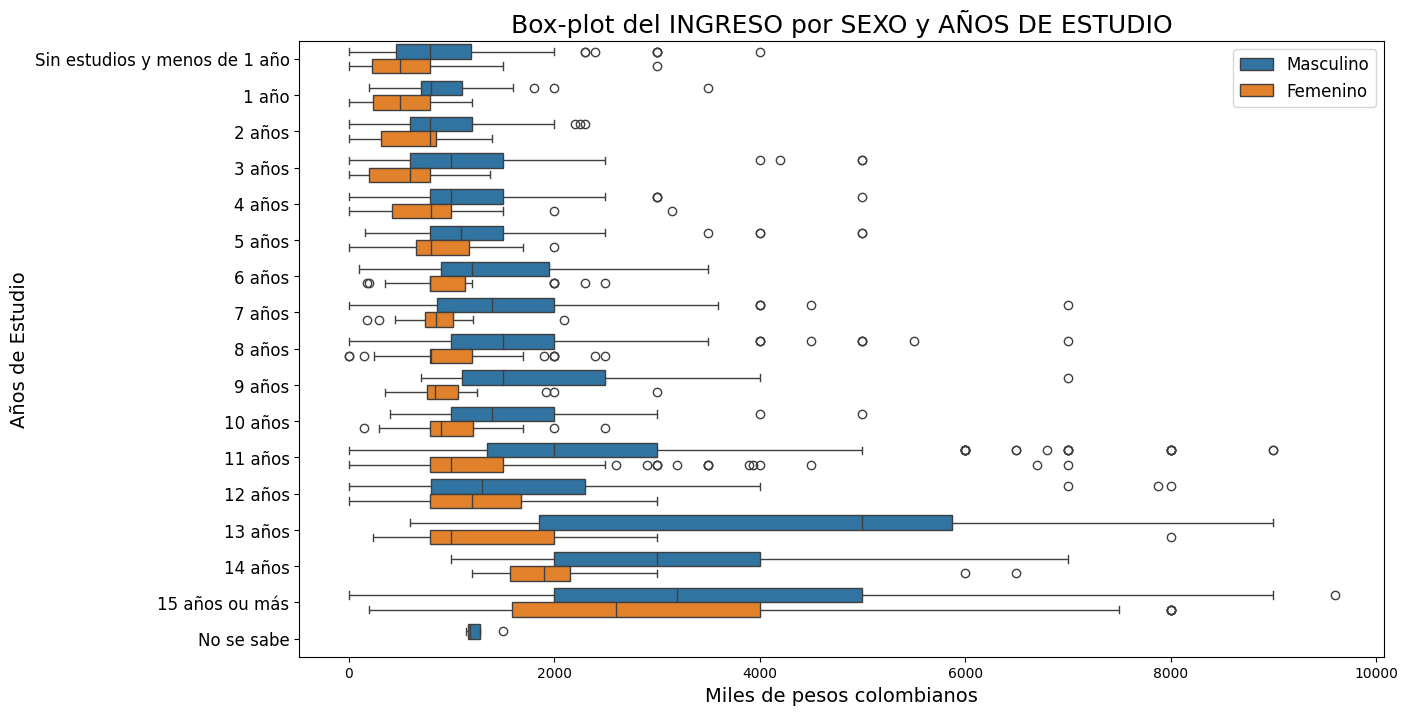

In [64]:
ax = sns.boxplot(x = 'Ingreso', y = 'Años de Estudio', hue = 'Sexo', data=datos.query('Ingreso < 10000 and Edad == 50'), orient='h')

ax.figure.set_size_inches(14, 8)    # Personalizando el tamaño de la figura

ax.set_title('Box-plot del INGRESO por SEXO y AÑOS DE ESTUDIO', fontsize=18)    # Configurando el título del gráfico

ax.set_xlabel('Miles de pesos colombianos', fontsize=14)    # Configurando el label del eje X

ax.set_ylabel('Años de Estudio', fontsize=14)    # Configurando el label del eje Y
ax.set_yticklabels([key for key in anos_de_estudio.values()], fontsize=12)    # Configurando el label de cada categoría del eje Y

# Configurações da legenda do gráfico (Sexo)
handles, _ = ax.get_legend_handles_labels()
ax.legend(handles, ['Masculino', 'Femenino'], fontsize=12)

ax

### Obtenga la media, mediana, valor máximo y  desviación estandar de la variable INGRESO según las CIUDADES
#### <font color='blue'>Destaque los puntos más importantes que usted observa en las tabulaciones</font>
#### <font color='red'>Utilice el método <i>groupby()</i> de <i>pandas</i> conjuntamente com el método <i>agg()</i> para contruir la tabulación. El método <i>agg()</i> puede recibir un diccionario especificando cual columna del DataFrame deve ser utilizada y cual lista de funciones estadísticas queremos obtener, por ejemplo: <i>datos.groupby(['Ciudad']).agg({'Ingreso': ['mean', 'median', 'max', 'std']})</i></font>

In [65]:
ingreso_estadisticas_por_ciudad = datos.groupby(['Ciudad']).agg({'Ingreso': ['mean', 'median', 'max', 'std']})
ingreso_estadisticas_por_ciudad

Ingreso                             
               mean  median     max          std
Ciudad                                          
11      1789.761223  1200.0   50000  2406.161161
12      1506.091782   900.0   30000  2276.233415
13      1445.130100   900.0   22000  1757.935591
14      1783.588889  1000.0   20000  2079.659238
15      1399.076871   850.0   50000  2053.779555
16      1861.353516  1200.0   15580  2020.688632
17      1771.094946  1000.0   60000  2934.590741
21      1019.432009   700.0   30000  1887.816905
22      1074.550784   750.0   40000  2373.355726
23      1255.403692   789.0   25000  1821.963536
24      1344.721480   800.0   15500  1651.805500
25      1293.370487   788.0   30000  1950.272431
26      1527.079319   900.0   50000  2389.622497
27      1144.552602   788.0   11000  1237.856197
28      1109.111111   788.0   16000  1478.997878
29      1429.645094   800.0  200000  3507.917248
31      2056.432084  1200.0  100000  3584.721547
32      2026.383852  1274.0  100000  3513.846868
33      2496.403168  1400.0  200000  5214.583518
35      2638.104986  1600.0   80000  3503.777366
41      2493.870753  1500.0  200000  4302.937995
42      2470.854945  1800.0   80000  3137.651112
43      2315.158336  1500.0   35000  2913.335783
50      2262.604167  1500.0   42000  3031.419122
51      2130.652778  1500.0   35000  2542.630178
52      1994.580794  1500.0   30000  2221.933065
53      4241.954722  2000.0  100000  5550.463338

### Construya un box plot de la variable INGRESO según las CIUDADES
#### <font color='blue'>¿Es posible verificar algun comportamiento diferenciado en el rendimiento entre los grupos analizados? Evalue el gráfico y destaque los puntos más importantes.</font>
#### <font color='red'>1º - Utilice solamente las informaciones de personas con ingreso abajo de $ 10.000</font>

<Axes: title={'center': 'Box-plot del INGRESO por CIUDADES (códigos)'}, xlabel='Miles de pesos colombianos', ylabel='Códigos de las ciudades'>

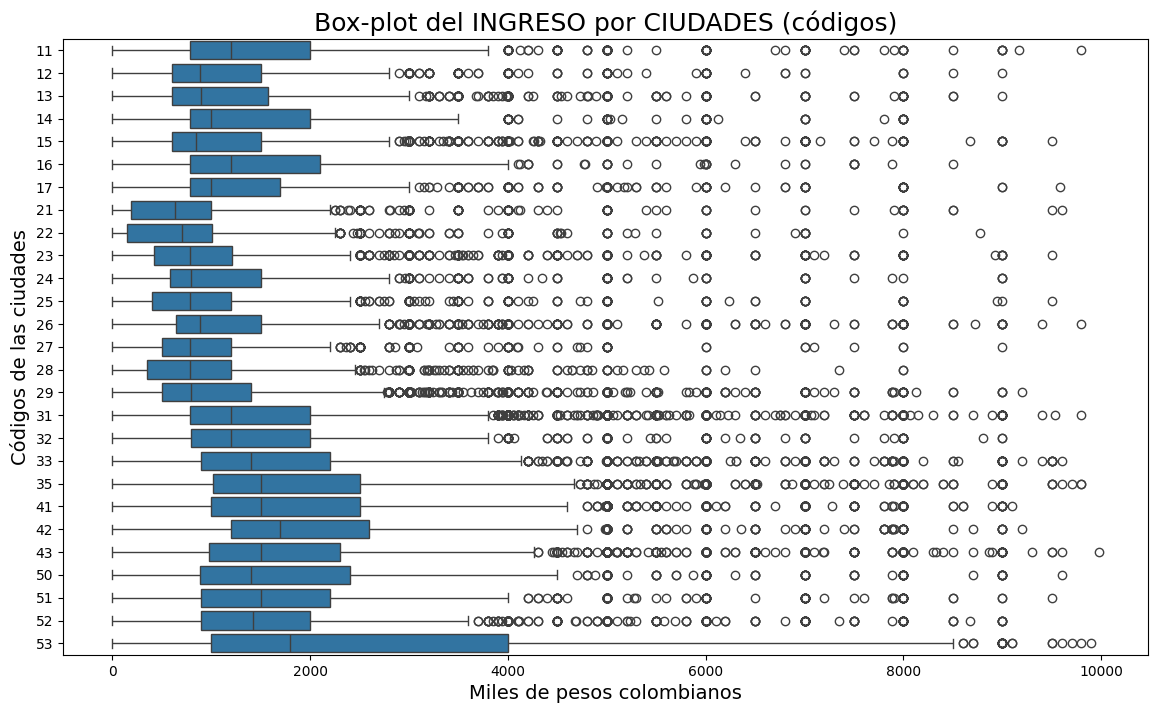

In [66]:
ax = sns.boxplot(x = 'Ingreso', y = 'Ciudad', data=datos.query('Ingreso < 10000'), orient='h')

ax.figure.set_size_inches(14, 8)    # Personalizando o tamaño de la figura

ax.set_title('Box-plot del INGRESO por CIUDADES (códigos)', fontsize=18)    # Configurando el título del gráfico

ax.set_xlabel('Miles de pesos colombianos', fontsize=14)    # Configurando el label del eje X

ax.set_ylabel('Códigos de las ciudades', fontsize=14)    # Configurando el label del eje Y
#ax.set_yticklabels([key for key in ciudad.values()], fontsize=12)    # Configurando el label de cada categoría del eje Y

ax

<ipython-input-70-7a5b776a82c0>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x = 'Ingreso', y = 'Ciudad', data=datos.query('Ingreso < 10000'), orient='h', palette=unique_colors)


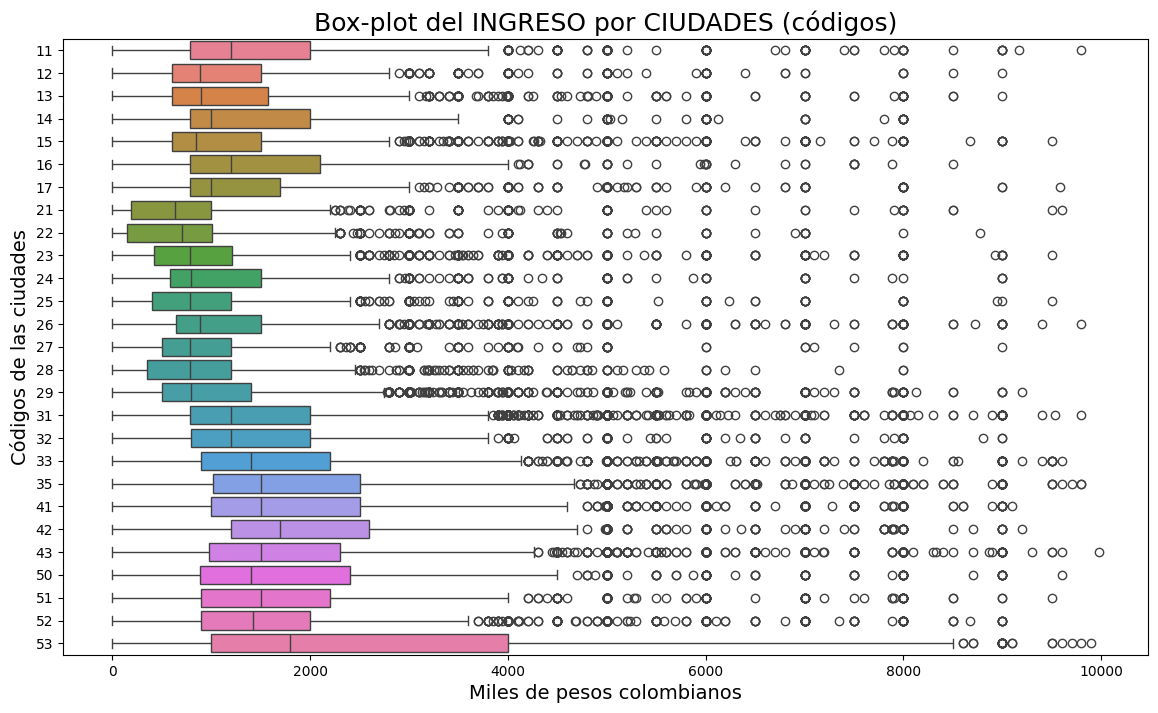

In [70]:
#GENERAR COLORES DISTINTIVOS

# Generar una paleta de colores únicos
unique_colors = sns.color_palette("husl", len(datos['Ciudad'].unique()))  # 'husl' genera colores distintivos

# Crear el gráfico boxplot con colores únicos
ax = sns.boxplot(x = 'Ingreso', y = 'Ciudad', data=datos.query('Ingreso < 10000'), orient='h', palette=unique_colors)

# Personalización del gráfico
ax.figure.set_size_inches(14, 8)    # Tamaño de la figura
ax.set_title('Box-plot del INGRESO por CIUDADES (códigos)', fontsize=18)    # Título
ax.set_xlabel('Miles de pesos colombianos', fontsize=14)    # Etiqueta del eje X
ax.set_ylabel('Códigos de las ciudades', fontsize=14)    # Etiqueta del eje Y

# Mostrar el gráfico
plt.show()
